2장. 사전 훈련된 신경망
=====================

2.1 이미지를 인식하는 사전 훈련된 신경망
-----------------------------

> 2.1.1 이미지 인식을 위해 사전 훈련된 신경망 가져오기

In [3]:
from torchvision import models

In [5]:
dir(models)
# 대문자로 시작하는 이름: 유명 모델들의 실제 구현체
# 소문자로 시작하는 이름: 편의상 모델 클래스의 인스턴스를 바로 받아쓸 수 있는 함수, 때때로 파라미터 집합 달라짐

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

> 2.1.2 알렉스넷

- 알렉스넷: 오늘날 최신 모델과 비교했을 때 소규모 신경망에 해당
- 입력 이미지가 들어오고, 다섯 층의 필터를 거쳐가며 각 단계에서 변환된 이미지가 출력됨
- 필터를 거친 후에는 1차원 벡터가 있고, 최종적으로 1000개의 확률값 출력 (값 하나는 클래스 하나를 의미)

In [6]:
alexnet=models.AlexNet()

- 신경망을 초기화하지 않고 그대로 사용하면 원치 않는 값이 나온다.
- 현재는 백지상태 혹은 임의의 값이 들어있기 때문

> 2.1.3 레즈넷

In [7]:
resnet=models.resnet101(pretrained=True)

C:\Users\yoonh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\yoonh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\yoonh/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100.0%


- 레즈넷101 함수를 사용해서 계층 수가 101개인 신경망 만들 수 있음
- 레즈넷101: 1000개의 카테고리로 구분한 120만개의 이미지 데이터셋인 이미지넷으로 훈련됨

> 2.1.4 준비, 시...작 전에 잠깐만

In [9]:
resnet
# resnet101 신경망 구조 세부 확인

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

- 코드의 각 줄마다 modules 사용: 각각 개별 연산으로, 신경망을 구성하는 블럭
- resnet 변수는 함수처럼 사용 가능 --> 하나 이상의 이미지를 입력으로 받아 1000개의 이미지넷 클래스별 점수를 만듦
- 이미지 입력 전, 크기 조정이 필요 (torchvision 모듈에서 transforms 제공)

In [10]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
# 이미지의 크기를 256*256으로 조정하고 중심으로부터 224*224로 잘라낸 후 텐서 형태로 전환

In [14]:
from PIL import Image
img = Image.open("C:/Users/yoonh/deeplearning/bobby.png")

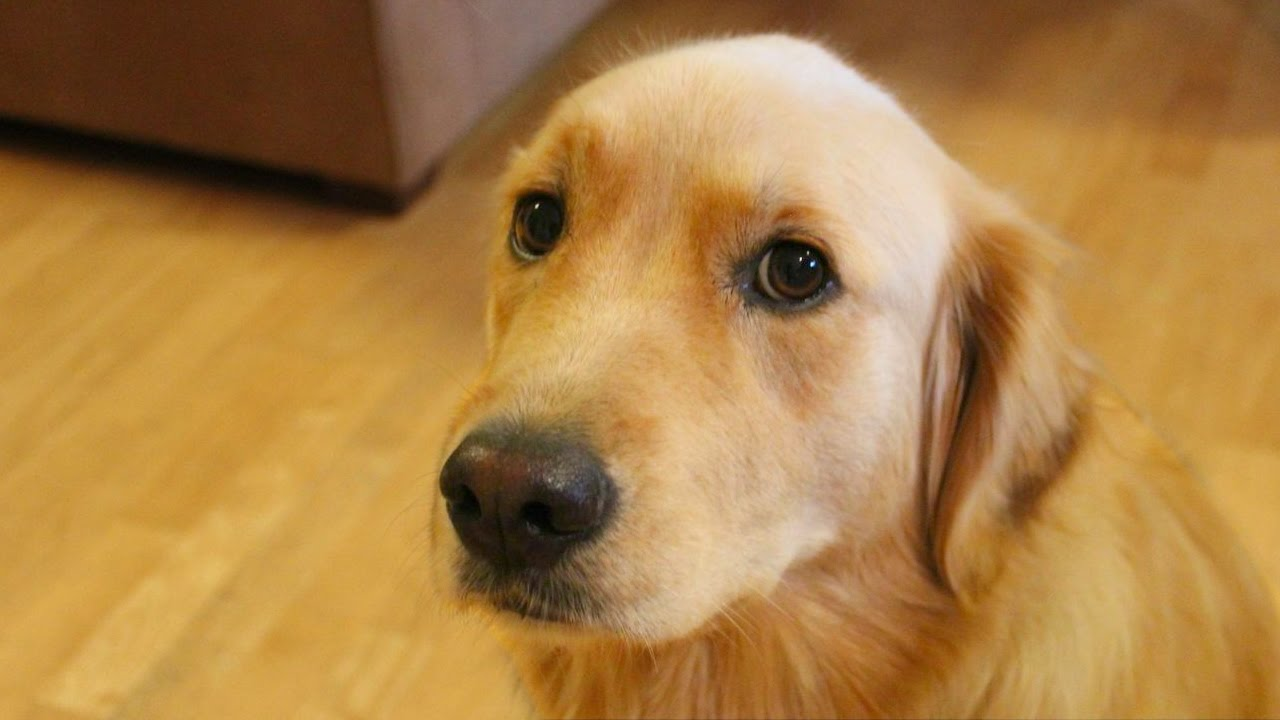

In [15]:
img

In [16]:
img_t=preprocess(img)

In [17]:
import torch
batch_t=torch.unsqueeze(img_t,0)

> 2.1.5 실행!

In [18]:
# 훈련된 모델에 새로운 데이터를 넣어 결과를 보는 과정을 추론이라고 한다.
# 추론을 수행하려면 신경망을 eval 모드로 설정해야 한다.
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
out=resnet(batch_t)
out
# 1000개의 스코어를 만들어냈고, 이는 이미지넷 클래스에 각각 대응된다.

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7915e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0362e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3942e-01, -1.4489e+00, -1.5039e+00,
         -2.1096e+00, -1.7095e+00, -4.

In [28]:
with open('C:/Users/yoonh/deeplearning/imagenet1000.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [30]:
labels

["{0: 'tench, Tinca tinca',",
 "1: 'goldfish, Carassius auratus',",
 "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 "3: 'tiger shark, Galeocerdo cuvieri',",
 "4: 'hammerhead, hammerhead shark',",
 "5: 'electric ray, crampfish, numbfish, torpedo',",
 "6: 'stingray',",
 "7: 'cock',",
 "8: 'hen',",
 "9: 'ostrich, Struthio camelus',",
 "10: 'brambling, Fringilla montifringilla',",
 "11: 'goldfinch, Carduelis carduelis',",
 "12: 'house finch, linnet, Carpodacus mexicanus',",
 "13: 'junco, snowbird',",
 "14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
 "15: 'robin, American robin, Turdus migratorius',",
 "16: 'bulbul',",
 "17: 'jay',",
 "18: 'magpie',",
 "19: 'chickadee',",
 "20: 'water ouzel, dipper',",
 "21: 'kite',",
 "22: 'bald eagle, American eagle, Haliaeetus leucocephalus',",
 "23: 'vulture',",
 "24: 'great grey owl, great gray owl, Strix nebulosa',",
 "25: 'European fire salamander, Salamandra salamandra',",
 "26: 'c

In [32]:
_, index=torch.max(out,1)
index

tensor([207])

In [33]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("207: 'golden retriever',", 96.57185363769531)

In [35]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
# 골든리트리버일 확률이 96%라고 추측

[("207: 'golden retriever',", 96.57185363769531),
 ("208: 'Labrador retriever',", 2.6082706451416016),
 ("219: 'cocker spaniel, English cocker spaniel, cocker',",
  0.2699621915817261),
 ("168: 'redbone',", 0.17958936095237732),
 ("852: 'tennis ball',", 0.10991999506950378)]

2.2 가짜 이미지를 만드는 사전 훈련된 모델
-----------------------

> 2.2.1 GAN 게임

* GAN 게임: 두개의 신경망에서 하나는 화가 역할, 하나는 미술사가 역할을 하며, 최고의 화가와 최고의 위작 감별사가 되기 위해 경쟁
- 생성적 적대 신경망의 약자로 가짜 작품이 만들어지고, 서로 더 뛰어나기 위해 경쟁하는 신경망을 의미
- 원본과 구별할 수 없는 합성된 그림을 만들어내는 것이 목표이다.
- 생성자 신경망: 화가 역할을 하는 신경망으로, 사실같은 이미지를 만들어내는 작업 수행
- 식별자 신경망: 미술 작품 감별사 역할을 하는 신경망으로, 조작 또는 실제 이미지인지 판별
1. 처음: 생성자는 기준 그림과 전혀 다른 그림을 만들고 식별자는 이를 쉽게 구분한다.
2. 훈련 진행: 식별자로부터 얻은 정보로 생성자가 점점 개선됨
3. 훈련 끝: 생성자는 그럴싸한 가짜 이미지를 만들고, 식별자는 진짜와 가짜를 구분할 수 없다.

> 2.2.2 사이클 GAN

- 사이클 GAN: GAN 개념을 더 흥미있게 발전시킨 개념
- 한 도메인에 대한 이미지를 다른 도메인으로 바꿀 수 있다.
- 두개의 개별 생성자 신경망이 있고, 두 개의 식별자 신경망이 있다.
* 말을 얼룩말로 바꾸기
- 첫번째 생성자: 말 그림 분포 값을 가진 그림에서 목표에 해당하는 얼룩말 이미지의 분포값과 일치하는 이미지를 만들도록 학습
- 두번째 생성자: 동시에, 가짜 얼룩말 사진을 식별자에게 보냄 (사이클)
- 이 때, 각도가 동일한 말과 얼룩말 사진이 필요하지 않다.
- 생성자는 뭘 어떻게 해야하는지 알려주지 않아도 사진 속 사물을 어떻게 바꿔야 하는지 배운다.

> 2.2.3 말을 얼룩말로 바꾸는 신경망

In [36]:
import torch
import torch.nn as nn

In [40]:
class ResNetBlock(nn.Module): # <1>
    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):
    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3>

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
            nn.InstanceNorm2d(ngf),
            nn.ReLU(True)
        ]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [
                nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3, stride=2, padding=1, bias=True),
                nn.InstanceNorm2d(ngf * mult * 2),
                nn.ReLU(True)
            ]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [
                nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                    kernel_size=3, stride=2,
                                    padding=1, output_padding=1,
                                    bias=True),
                nn.InstanceNorm2d(int(ngf * mult / 2)),
                nn.ReLU(True)
            ]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [41]:
netG=ResNetGenerator()

In [69]:
model_path = 'C:/Users/yoonh/Downloads/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [70]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [71]:
from PIL import Image
from torchvision import transforms

In [72]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()]
)

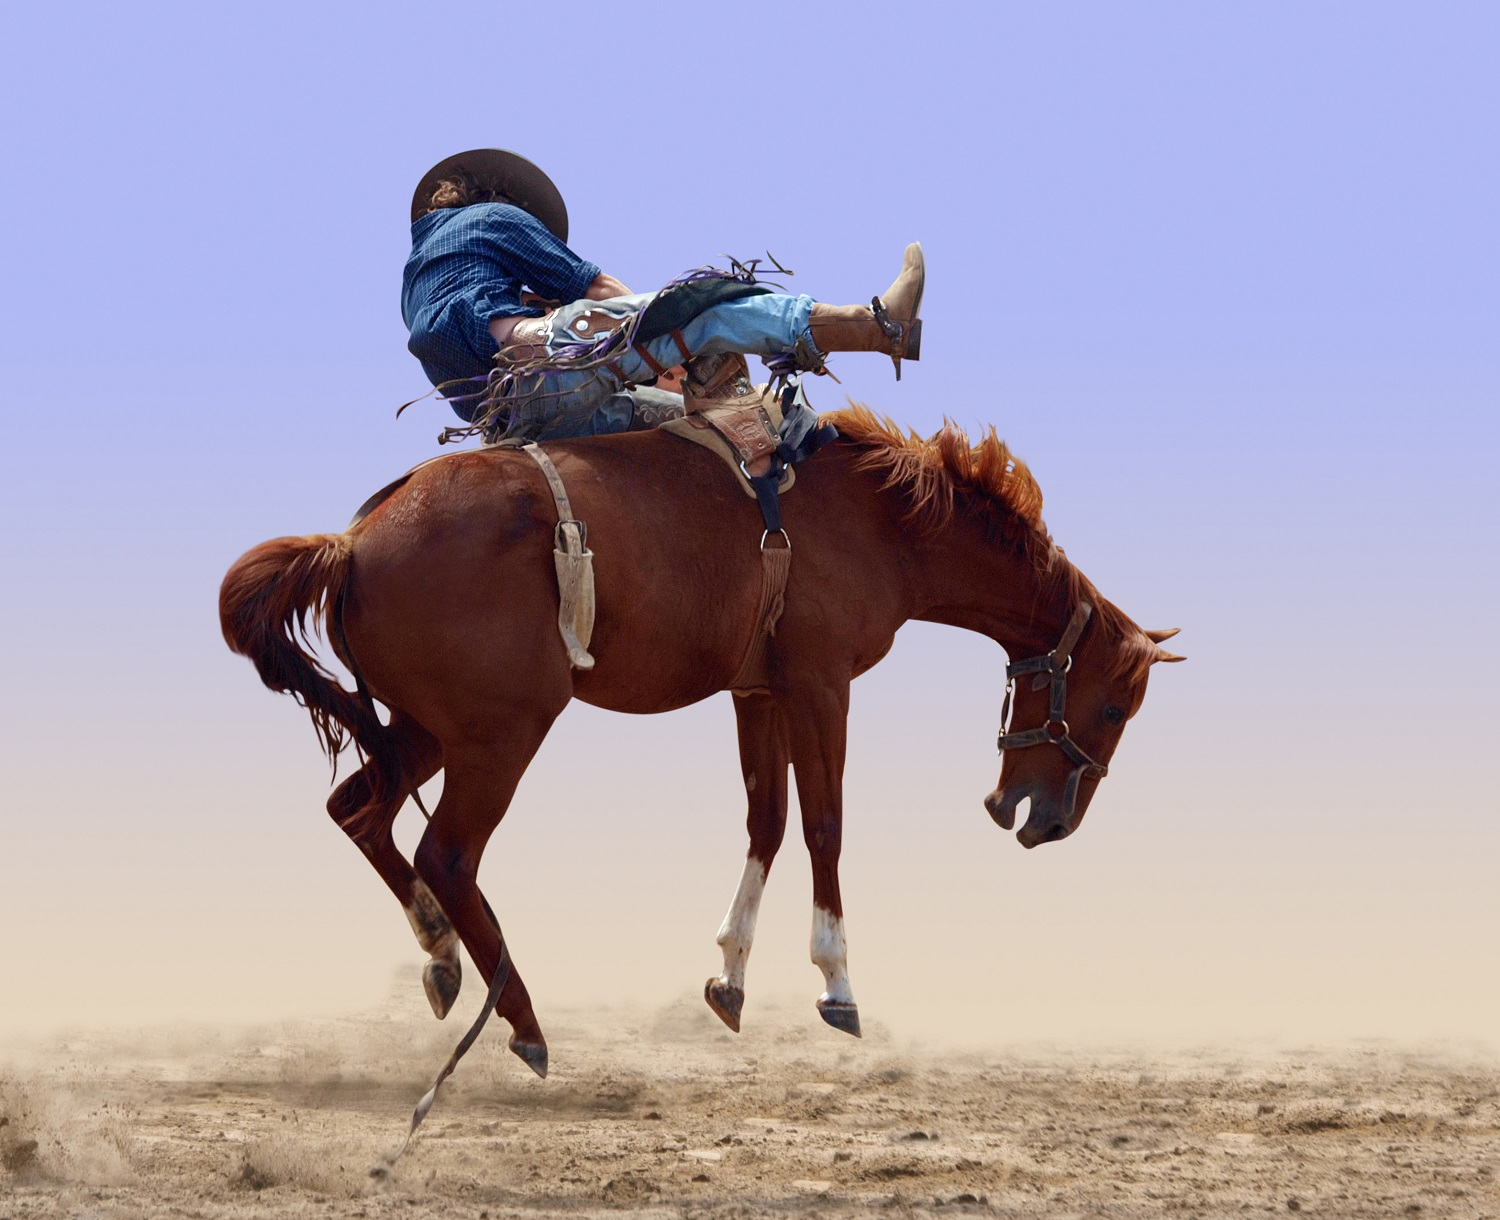

In [73]:
img = Image.open("C:/Users/yoonh/Downloads/horse.jpg")
img

In [74]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [75]:
batch_out = netG(batch_t)

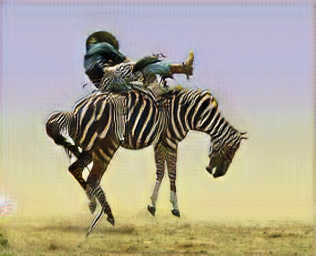

In [76]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

2.3 장면을 설명하는 사전 훈련된 신경망
-------------------

> 안드레이 카르파티가 설계한 뉴럴토크2

- 사진을 보여주면 해당 장면을 설명하는 영어자막을 만들어냄
- 신경망 구성: 장면을 숫자로 표현하는 법을 학습하는 신경망 + 순환신경망(숫자로 문장을 만듦)

> 2.3.1 뉴럴토크2

- 동물의 종류는 잘 인식하지만, 얼룩말이 몇마리일지는 인식하기 어려울 수 있다.
- 또한 말에 사람이 타고 있는 훈련셋이 없을 가능성이 크기 때문에 말 위에 사람이 있다는 것 또한 인식하기 어려울 수 있다.

2.4 토치 허브
---------------

import torch   
from torch import hub   
resnet18_model=hub.load('pytorch/vision:master', 'resnet18', pretrained=True)

2.5 결론
------

- 여기서 배운 지식으로 사전에 훈련된 모델을 다운받아 튜닝하여 다른 작업에도 적용해볼 수 있다.